In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('D:/minor project tumor/Brain Tumor Data Set/Brain Tumor Data Set'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import seaborn as sns

In [3]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99))
# ,dtype=tf.float32

In [4]:
train = gen.flow_from_directory("C:\\Users\\KIIT\\Documents\\Saksham\\Code\\Minor\\minor project tumor\\Brain Tumor Data Set\\bt",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [5]:
val = gen.flow_from_directory("C:\\Users\\KIIT\\Documents\\Saksham\\Code\\Minor\\minor project tumor\\Brain Tumor Data Set\\bt",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 919 images belonging to 2 classes.


In [6]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>


<Axes: >

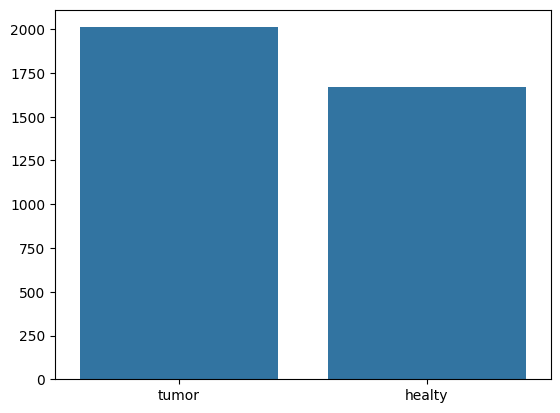

In [7]:
t=0
h=0
for i in range(15):
    print(train)
    a, b = next(iter(train))
    print(type(train))
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])

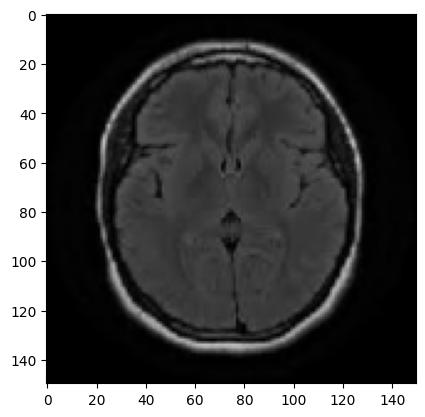

In [8]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

In [9]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adagrad

In [10]:
model=keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adagrad(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,243,457 (42.89 MB)

 Trainable params: 11,243,073 (42.89 MB)

 Non-trainable params: 384 (1.50 KB)

In [12]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [13]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [14]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=10,validation_data=(val))

Epoch 1/10


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.6546 - loss: 0.6867 - val_accuracy: 0.7617 - val_loss: 0.6708
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.7890 - loss: 0.4733 - val_accuracy: 0.6757 - val_loss: 0.6623
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8221 - loss: 0.3919 - val_accuracy: 0.7073 - val_loss: 0.6651
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8627 - loss: 0.3210 - val_accuracy: 0.6768 - val_loss: 0.6551
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.8631 - loss: 0.3034 - val_accuracy: 0.6235 - val_loss: 0.6502
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.8924 - loss: 0.2568 - val_accuracy: 0.6268 - val_loss: 0.6416
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9199 - loss: 0.2258 - val_accuracy: 0.5647 - val_loss: 0.6397
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9161 - loss: 0.2169 - val_accuracy: 0.5517 - val_loss: 0.6458
Epo

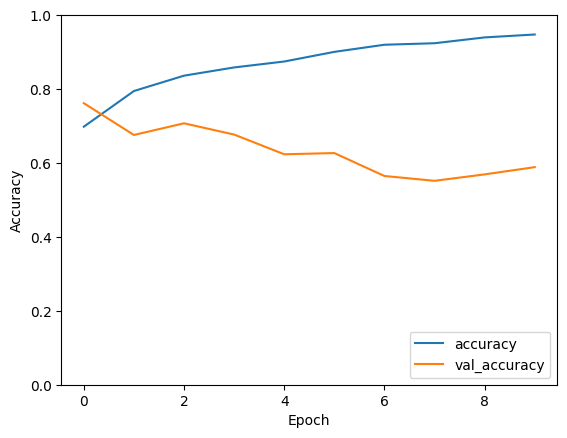

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

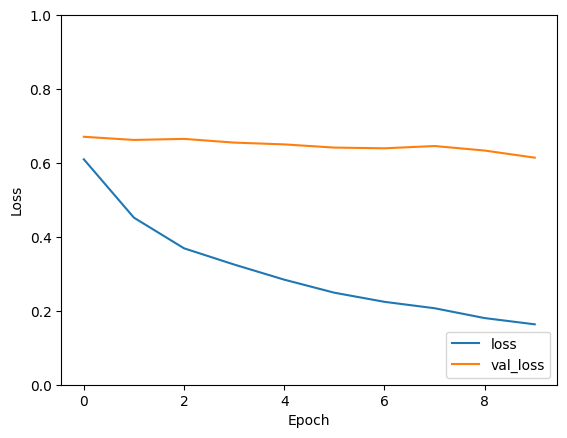

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [17]:
model.save('Model.keras')